In [2]:
import os,sys
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import sklearn
%matplotlib inline  


In [3]:
## Read data
dirname='/Users/ekargian/Documents/g-2/Trackers/ML_tracking/MC/'
datafilename = dirname+'treedata.pkl'
data=pickle.load(open(datafilename,'rb'))


In [4]:
df = pd.DataFrame.from_dict(data)
df.keys()



Index(['GasGunMuonX', 'GasGunMuonY', 'GasGunMuonZ', 'GasGunMuonPX',
       'GasGunMuonPY', 'GasGunMuonPZ', 'truthMuonPolX', 'truthMuonPolY',
       'truthMuonPolZ', 'TruthDecayVertexX', 'TruthDecayVertexY',
       'TruthDecayVertexZ', 'TruthDecayVertexPX', 'TruthDecayVertexPY',
       'TruthDecayVertexPZ', 'TruthDecayVertexPDGID',
       'TruthDecayVertexParentID', 'TruthDecayVertexTrackID',
       'TruthDecayVertexTime', 'TruthCaloPosX', 'TruthCaloPosY',
       'TruthCaloPosZ', 'TruthCaloMomX', 'TruthCaloMomY', 'TruthCaloMomZ',
       'TruthCaloTime', 'QualityCandidate', 'QualityTrack', 'hasTrack',
       'Station', 'RecoTrackX', 'RecoTrackY', 'RecoTrackZ', 'RecoTrackPX',
       'RecoTrackPY', 'RecoTrackPZ', 'RecoTrackP', 'pValue', 'nHits', 'nUHits',
       'nVHits', 'MissedLayersFrac', 'trackTime', 'MinDriftTime',
       'MaxDriftTime', 'MaxResidual', 'hasDecayVertex', 'QualityBeam',
       'RecoVertexX', 'RecoVertexY', 'RecoVertexZ', 'RecoVertexR',
       'RecoVertexP', 'RecoVertexP

In [5]:
## reco vertex position resolution
df['ResolVertexR']=(np.sqrt(df['TruthDecayVertexX']**2 + df['TruthDecayVertexZ']**2) - np.sqrt(df['RecoVertexX']**2+df['RecoVertexZ']**2) + 1.05)
df['ResolVertexY']=df['TruthDecayVertexY'] - df['RecoVertexY']
df['diff_UV']=df['nUHits']-df['nVHits']
df['RecoVertexAzimuth']=np.arctan2(df['RecoVertexZ'],df['RecoVertexX'])
df.loc[df['RecoVertexAzimuth']<0, 'RecoVertexAzimuth']+=2*np.pi
df['TruthDecayVertexAzimuth']=np.arctan2(df['TruthDecayVertexZ'],df['TruthDecayVertexX'])
df.loc[df['TruthDecayVertexAzimuth']<0, 'TruthDecayVertexAzimuth']+=2*np.pi
df['TruthDecayVertexR']=np.sqrt(df['TruthDecayVertexX']**2 + df['TruthDecayVertexZ']**2)

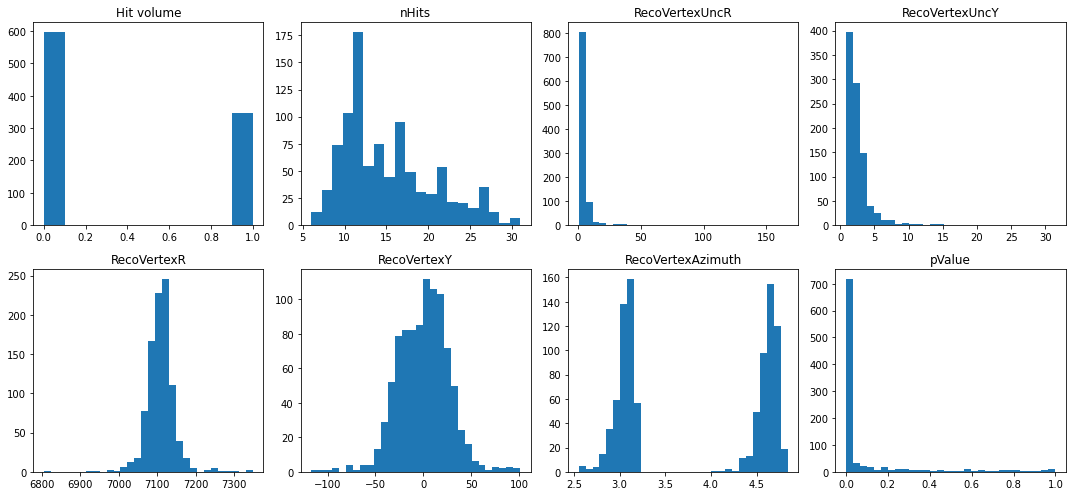

In [6]:
## Take a look at some parameters that are used for QC
fig, ax = plt.subplots(2, 4, figsize=(15,7))
ax[0,0].hist(df['hitVolume'])
ax[0,0].set_title('Hit volume')
ax[0,1].hist(df['nHits'],bins=20)
ax[0,1].set_title('nHits')
ax[0,2].hist(df['RecoVertexUncR'],bins=30)
ax[0,2].set_title('RecoVertexUncR')
ax[0,3].hist(df['RecoVertexUncY'],bins=30)
ax[0,3].set_title('RecoVertexUncY')
ax[1,0].hist(df['RecoVertexR'],bins=30)
ax[1,0].set_title('RecoVertexR')
ax[1,1].hist(df['RecoVertexY'],bins=30)
ax[1,1].set_title('RecoVertexY')
ax[1,2].hist(df['RecoVertexAzimuth'],bins=30)
ax[1,2].set_title('RecoVertexAzimuth')
ax[1,3].hist(df['pValue'],bins=30)
ax[1,3].set_title('pValue')

fig.tight_layout()

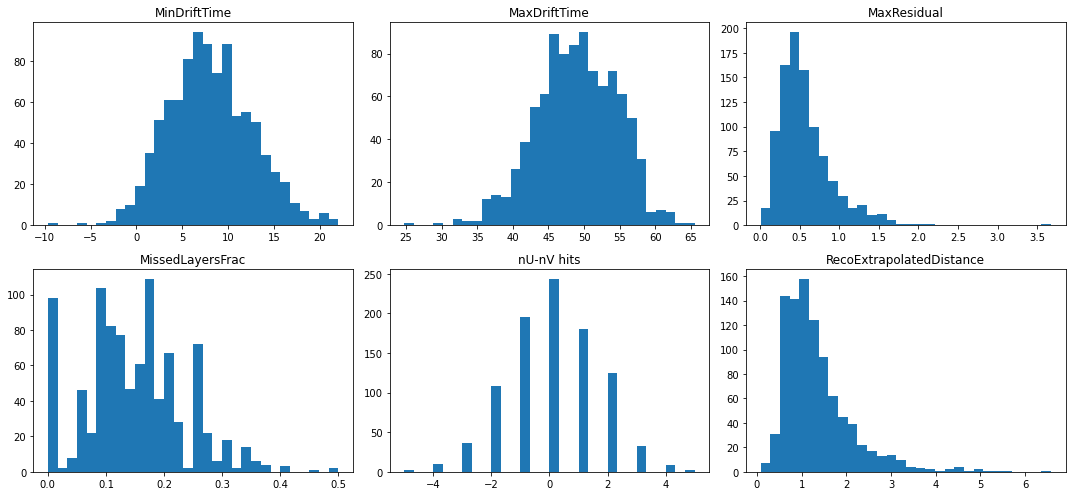

In [7]:
## Some more parameters:
fig, ax = plt.subplots(2, 3, figsize=(15,7))
ax[0,0].hist(df['MinDriftTime'],bins=30)
ax[0,0].set_title('MinDriftTime')
ax[0,1].hist(df['MaxDriftTime'],bins=30)
ax[0,1].set_title('MaxDriftTime')
ax[0,2].hist(df['MaxResidual'],bins=30)
ax[0,2].set_title('MaxResidual')
ax[1,0].hist(df['MissedLayersFrac'],bins=30)
ax[1,0].set_title('MissedLayersFrac')
ax[1,1].hist(df['diff_UV'],bins=30)
ax[1,1].set_title('nU-nV hits')
ax[1,2].hist(df['RecoExtrapolatedDistance'],bins=30)
ax[1,2].set_title('RecoExtrapolatedDistance')

fig.tight_layout()

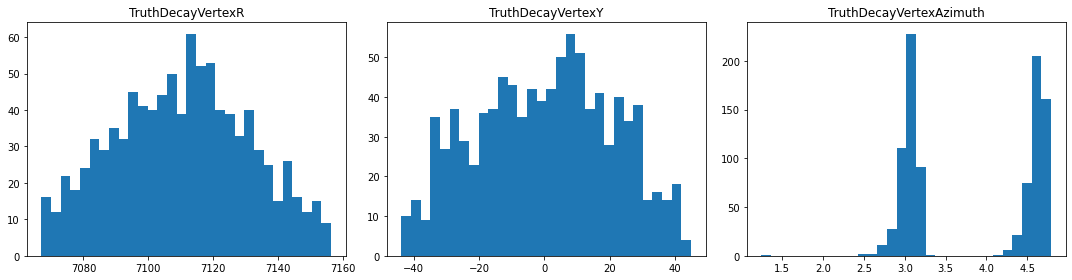

In [8]:
## Truth vertex
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].hist(df['TruthDecayVertexR'],bins=30)
ax[0].set_title('TruthDecayVertexR')
ax[1].hist(df['TruthDecayVertexY'],bins=30)
ax[1].set_title('TruthDecayVertexY')
ax[2].hist(df['TruthDecayVertexAzimuth'],bins=30)
ax[2].set_title('TruthDecayVertexAzimuth')

fig.tight_layout()

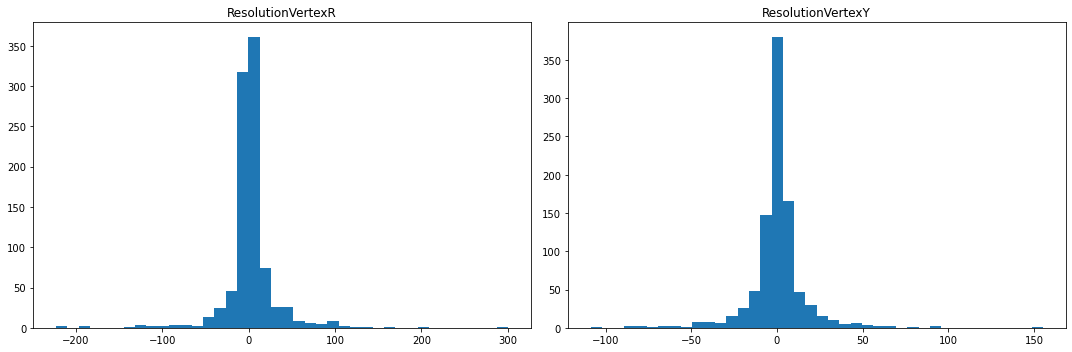

In [9]:
## Decay vertex resolution
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(df['ResolVertexR'],bins=40)
ax[0].set_title('ResolutionVertexR')
ax[1].hist(df['ResolVertexY'],bins=40)
ax[1].set_title('ResolutionVertexY')
fig.tight_layout()

In [10]:
quality_cutoff=5 ## try different values of cutoff, and different mask too
df['quality']=0
mask=(abs(df['ResolVertexR'])<quality_cutoff) & (abs(df['ResolVertexY'])<quality_cutoff)
df.loc[mask,'quality']=1

In [11]:
### Quality-cuts selected data
qdf=df.loc[(df['QualityTrack']>0) & (df['QualityBeam']>0)].copy()

In [12]:
### DF with partial cuts applied to remove outliers (outliers wrt the accepted track population)
mask=(df['RecoVertexUncR']<10) & (df['RecoVertexUncY']<4) & (df['RecoVertexR']>7050) & (df['MaxResidual']<0.6) & (df['MissedLayersFrac']<0.3) & (df['RecoExtrapolatedDistance']<4) 
df_cutout=df.loc[mask].copy()

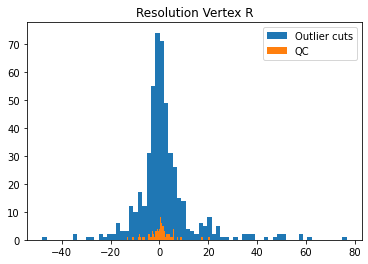

In [13]:
## resolution before/after QC

fig, ax = plt.subplots()
ax.hist(df_cutout['ResolVertexR'], bins=70, label='Outlier cuts')
ax.hist(qdf['ResolVertexR'], bins=70, label='QC')
ax.set_title('Resolution Vertex R')
ax.legend()


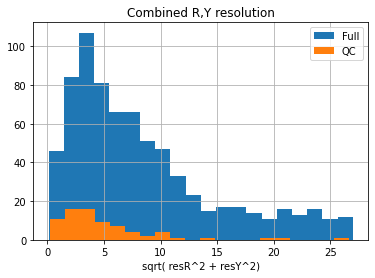

In [13]:
fig, ax = plt.subplots()
ax.hist( np.sqrt(df['ResolVertexR']**2 + df['ResolVertexY']**2).loc[np.sqrt(df['ResolVertexR']**2 + df['ResolVertexY']**2)<27] , bins=20, label='Full')
ax.hist( np.sqrt(qdf['ResolVertexR']**2 + qdf['ResolVertexY']**2), bins=20, label='QC')
ax.set_xlabel("sqrt( resR^2 + resY^2)")
ax.set_title("Combined R,Y resolution")
ax.legend()
ax.grid()

## Now create the classifier parameters, and the target variable

(array([ 9., 21., 22., 11.,  5.,  3.,  0.,  1.,  1.,  1.]),
 array([ 4.19815254,  6.38917675,  8.58020096, 10.77122517, 12.96224937,
        15.15327358, 17.34429779, 19.535322  , 21.72634621, 23.91737041,
        26.10839462]),
 <BarContainer object of 10 artists>)

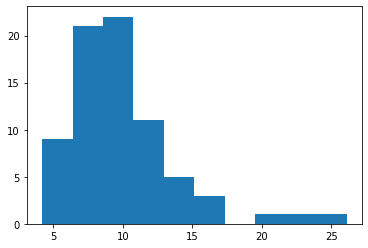

In [55]:
plt.hist(qdf['RecoVertexUncP'])

In [56]:
## Min set of vars
#clf_vars=['pValue','nHits','diff_UV','MissedLayersFrac','MaxResidual','hitVolume','RecoExtrapolatedDistance','RecoVertexUncY','RecoVertexUncR']
## Add in reco momentum and uncertainty
clf_vars=['pValue','nHits','diff_UV','MissedLayersFrac','MaxResidual','hitVolume','RecoExtrapolatedDistance','RecoVertexUncY','RecoVertexUncR', 'RecoVertexUncP','RecoVertexUncPR', 'RecoVertexUncPY','RecoTrackP']
## Add in some weaker parameters, which are however used for QC: MinDriftTime, MaxDriftTime, RecoVertexR, RecoVertexY
#clf_vars=['pValue','nHits','diff_UV','MissedLayersFrac','MaxResidual','hitVolume','RecoExtrapolatedDistance','RecoVertexUncY','RecoVertexUncR','RecoVertexUncP','RecoVertexUncPR', 'RecoVertexUncPY','RecoTrackP','MinDriftTime', 'MaxDriftTime','RecoVertexR', 'RecoVertexY']
## Add in calo vertex
#clf_vars=['pValue','nHits','diff_UV','MissedLayersFrac','MaxResidual','hitVolume','RecoExtrapolatedDistance','RecoVertexUncY','RecoVertexUncR','RecoVertexUncP','RecoVertexUncPR', 'RecoVertexUncPY','RecoTrackP','CaloVertexMomUnc','CaloVertexUncX','CaloVertexUncY']
## also, more ambitiously: MinDriftTime, MaxDriftTime -- no: this doesn't seem to work well
X=df_cutout[clf_vars].values
y=df_cutout['quality'].values

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Start with a Decision Tree classifier

In [58]:
clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=0.01) 

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_dt,X,y,cv=10)

array([0.64      , 0.62      , 0.66      , 0.62      , 0.64      ,
       0.73469388, 0.69387755, 0.73469388, 0.73469388, 0.6122449 ])

### Tune hyper-parameters of DT classifier
Using a grid search. 
Tune specifically for precision.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'splitter': ['best','random'], 
                     'max_depth': [2,3,4,5],
                     'min_samples_split': [1,0.8,0.5,0.3] }]

#scores = ['precision', 'recall']
scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_dt = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf_dt.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf_dt.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf_dt.cv_results_['mean_test_score']
    stds = clf_dt.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_dt.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf_dt.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()






# Tuning hyper-parameters for precision



/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_

/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 0.3, 'splitter': 'best'}

Grid scores on development set:

nan (+/-nan) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 1, 'splitter': 'best'}
nan (+/-nan) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 1, 'splitter': 'random'}
0.692 (+/-0.081) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.8, 'splitter': 'best'}
0.648 (+/-0.067) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.8, 'splitter': 'random'}
0.692 (+/-0.081) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.5, 'splitter': 'best'}
0.678 (+/-0.041) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.5, 'splitter': 'random'}
0.698 (+/-0.089) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.3, 'splitter': 'best'}
0.669 (+/-0.072) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.3, 'splitter': 'rando

/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_

In [61]:
clf_dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=0.3,splitter='best') 
clf_dt.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=0.3)

### Cost-complexity pruning of classifier
This can be skipped after the grid search performed above

In [22]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

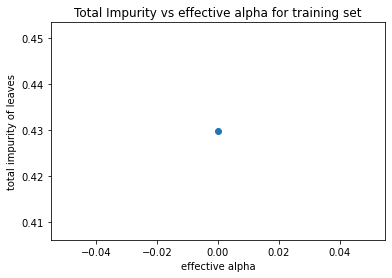

In [23]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [140]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 5 with ccp_alpha: 0.0


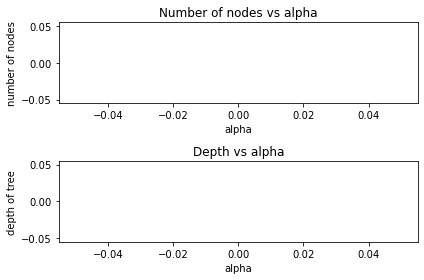

In [141]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

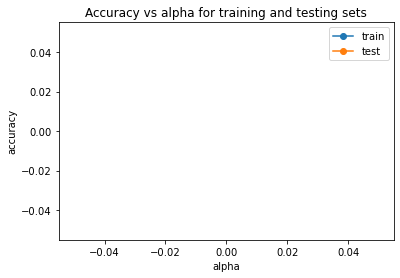

In [142]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()


In [145]:
clf_dt = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=2,min_samples_split=0.3,splitter='best') 
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=0.3,
                       random_state=42)

## Separate classifier with Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
clf_gbm = GradientBoostingClassifier(n_estimators=500)

### Grid search for hyper parameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'n_estimators': [100,500,1000], 
                     'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
                    'ccp_alpha': [0.001, 0.005, 0.01, 0.03]}]

#scores = ['precision', 'recall']
scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_gbm = GridSearchCV(
        GradientBoostingClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf_gbm.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf_gbm.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf_gbm.cv_results_['mean_test_score']
    stds = clf_gbm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_gbm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf_gbm.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()




# Tuning hyper-parameters for precision



/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ekargian/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters set found on development set:

{'ccp_alpha': 0.001, 'learning_rate': 0.25, 'n_estimators': 100}

Grid scores on development set:

0.695 (+/-0.081) for {'ccp_alpha': 0.001, 'learning_rate': 0.05, 'n_estimators': 100}
0.695 (+/-0.081) for {'ccp_alpha': 0.001, 'learning_rate': 0.05, 'n_estimators': 500}
0.692 (+/-0.084) for {'ccp_alpha': 0.001, 'learning_rate': 0.05, 'n_estimators': 1000}
0.692 (+/-0.089) for {'ccp_alpha': 0.001, 'learning_rate': 0.075, 'n_estimators': 100}
0.699 (+/-0.091) for {'ccp_alpha': 0.001, 'learning_rate': 0.075, 'n_estimators': 500}
0.692 (+/-0.089) for {'ccp_alpha': 0.001, 'learning_rate': 0.075, 'n_estimators': 1000}
0.698 (+/-0.099) for {'ccp_alpha': 0.001, 'learning_rate': 0.1, 'n_estimators': 100}
0.698 (+/-0.099) for {'ccp_alpha': 0.001, 'learning_rate': 0.1, 'n_estimators': 500}
0.698 (+/-0.099) for {'ccp_alpha': 0.001, 'learning_rate': 0.1, 'n_estimators': 1000}
0.705 (+/-0.088) for {'ccp_alpha': 0.001, 'learning_rate': 0.25, 'n_estimator

The cell below can be skipped if the optimization above included ccp_alpha.
Otherwise remove ccp_alpha from the grid search above and sample it separately below, which is faster but ignores interplay with other hyper-parameters.
In any case, plotting the AUC score vs ccp_alpha would be interesting.

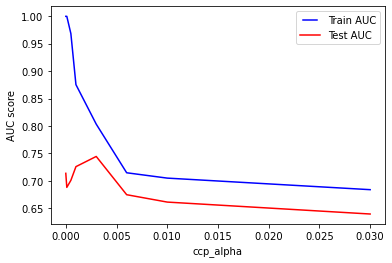

In [66]:
from sklearn.metrics import roc_curve, auc

ccp_alphas = [0, 0.0001, 0.0005, 0.001, 0.003, 0.006, 0.01,0.03]
train_results = []
test_results = []
for ccp_alpha in ccp_alphas:
    model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.25, ccp_alpha=ccp_alpha) 
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ccp_alphas, train_results, 'b', label='Train AUC')
line2, = plt.plot(ccp_alphas, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('ccp_alpha')
plt.show()




In [69]:
clf_gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=0.25, ccp_alpha=0.003).fit(X_train,y_train)
clf_gbm.score(X_test, y_test)

0.7449664429530202

## One more classifier, this one with SVM
Again perform a hyperparameter tuning via grid search

In [68]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf_svm.score(X_test, y_test)

0.7181208053691275

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#scores = ['precision', 'recall']
scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf_svm.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf_svm.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf_svm.cv_results_['mean_test_score']
    stds = clf_svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf_svm.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()



# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.581 (+/-0.048) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.536 (+/-0.086) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.589 (+/-0.113) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.605 (+/-0.077) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.584 (+/-0.065) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.607 (+/-0.030) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.578 (+/-0.032) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.600 (+/-0.078) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.688 (+/-0.145) for {'C': 1, 'kernel': 'linear'}
0.693 (+/-0.120) for {'C': 10, 'kernel': 'linear'}
0.690 (+/-0.108) for {'C': 100, 'kernel': 'linear'}
0.692 (+/-0.077) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full ev

In [71]:
clf_svm = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
clf_svm.score(X_test, y_test)

0.6711409395973155

## And yet another classifier, now with AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
clf_ada.score(X_test, y_test)

0.6375838926174496

In [73]:
tuned_parameters = [{'n_estimators': [50,100,500,1000], 'learning_rate': [0.01,0.1,0.3,0.6,1,2]}]

#scores = ['precision', 'recall']
scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_ada = GridSearchCV(
        AdaBoostClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf_ada.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf_ada.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf_ada.cv_results_['mean_test_score']
    stds = clf_ada.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_ada.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf_ada.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()




# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'learning_rate': 0.01, 'n_estimators': 500}

Grid scores on development set:

0.681 (+/-0.051) for {'learning_rate': 0.01, 'n_estimators': 50}
0.693 (+/-0.061) for {'learning_rate': 0.01, 'n_estimators': 100}
0.693 (+/-0.149) for {'learning_rate': 0.01, 'n_estimators': 500}
0.681 (+/-0.098) for {'learning_rate': 0.01, 'n_estimators': 1000}
0.686 (+/-0.113) for {'learning_rate': 0.1, 'n_estimators': 50}
0.673 (+/-0.114) for {'learning_rate': 0.1, 'n_estimators': 100}
0.648 (+/-0.059) for {'learning_rate': 0.1, 'n_estimators': 500}
0.649 (+/-0.053) for {'learning_rate': 0.1, 'n_estimators': 1000}
0.662 (+/-0.061) for {'learning_rate': 0.3, 'n_estimators': 50}
0.674 (+/-0.080) for {'learning_rate': 0.3, 'n_estimators': 100}
0.638 (+/-0.056) for {'learning_rate': 0.3, 'n_estimators': 500}
0.650 (+/-0.085) for {'learning_rate': 0.3, 'n_estimators': 1000}
0.683 (+/-0.108) for {'learning_rate': 0.6, 'n_es

In [74]:
clf_ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.01).fit(X_train, y_train)
clf_ada.score(X_test, y_test)

0.7046979865771812

# Metrics for classifier performance

In [75]:
## Predictions from classifiers
y_dt=clf_dt.predict(X)
df_cutout['y_dt']=y_dt
y_gbm=clf_gbm.predict(X)
df_cutout['y_gbm']=y_gbm
y_svm=clf_svm.predict(X)
df_cutout['y_svm']=y_svm
y_ada=clf_ada.predict(X)
df_cutout['y_ada']=y_ada

In [76]:
y_pred_dt=clf_dt.predict(X_test)
y_pred_gbm=clf_gbm.predict(X_test)
y_pred_svm=clf_svm.predict(X_test)
y_pred_ada=clf_ada.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Metrics for Gradient Boosting:')
print('Accuracy Score : ', accuracy_score(y_test,y_pred_gbm))
print('Precision Score : ', precision_score(y_test,y_pred_gbm))
print('Recall Score : ', recall_score(y_test,y_pred_gbm))
print('F1 Score : ', f1_score(y_test,y_pred_gbm))

Metrics for Gradient Boosting:
Accuracy Score :  0.7449664429530202
Precision Score :  0.7323943661971831
Recall Score :  0.7323943661971831
F1 Score :  0.7323943661971831


In [78]:
print('Metrics for Decision Tree classifier:')
print('Accuracy Score : ', accuracy_score(y_test,y_pred_dt))
print('Precision Score : ', precision_score(y_test,y_pred_dt))
print('Recall Score : ', recall_score(y_test,y_pred_dt))
print('F1 Score : ', f1_score(y_test,y_pred_dt))

Metrics for Decision Tree classifier:
Accuracy Score :  0.6778523489932886
Precision Score :  0.7017543859649122
Recall Score :  0.5633802816901409
F1 Score :  0.625


In [79]:
print('Metrics for SVM:')
print('Accuracy Score : ', accuracy_score(y_test,y_pred_svm))
print('Precision Score : ', precision_score(y_test,y_pred_svm))
print('Recall Score : ', recall_score(y_test,y_pred_svm))
print('F1 Score : ', f1_score(y_test,y_pred_svm))

Metrics for SVM:
Accuracy Score :  0.6711409395973155
Precision Score :  0.6486486486486487
Recall Score :  0.676056338028169
F1 Score :  0.6620689655172414


In [80]:
print('Metrics for AdaBoost:')
print('Accuracy Score : ', accuracy_score(y_test,y_pred_ada))
print('Precision Score : ', precision_score(y_test,y_pred_ada))
print('Recall Score : ', recall_score(y_test,y_pred_ada))
print('F1 Score : ', f1_score(y_test,y_pred_ada))

Metrics for AdaBoost:
Accuracy Score :  0.7046979865771812
Precision Score :  0.684931506849315
Recall Score :  0.704225352112676
F1 Score :  0.6944444444444443


We can choose to only accept tracks that were selected by all 3 classifiers

(remove clf_dt for now)

In [81]:
df_cutout['y_all']=0
mask=((df_cutout['y_ada']==1) & (df_cutout['y_gbm']==1) & (df_cutout['y_svm']==1))
df_cutout.loc[mask,'y_all']=1

In [82]:
df_cutout['y_voting']=0
mask=(df_cutout['y_ada']+df_cutout['y_gbm']+df_cutout['y_svm']>=2)
df_cutout.loc[mask,'y_voting']=1

In [83]:
print('                  \t  All \t\t Voting \n')
print('Accuracy Score  : \t %.3f \t\t %.3f ' % ( accuracy_score(df_cutout['quality'],df_cutout['y_all']), accuracy_score(df_cutout['quality'],df_cutout['y_voting']) ) )
print('Precision Score : \t %.3f \t\t %.3f ' % ( precision_score(df_cutout['quality'],df_cutout['y_all']), precision_score(df_cutout['quality'],df_cutout['y_voting']) ) )
print('Recall Score    : \t %.3f \t\t %.3f ' % ( recall_score(df_cutout['quality'],df_cutout['y_all']), recall_score(df_cutout['quality'],df_cutout['y_voting']) ) )
print('F1 Score        : \t %.3f \t\t %.3f ' % ( f1_score(df_cutout['quality'],df_cutout['y_all']), f1_score(df_cutout['quality'],df_cutout['y_voting']) ) )


                  	  All 		 Voting 

Accuracy Score  : 	 0.731 		 0.754 
Precision Score : 	 0.810 		 0.758 
Recall Score    : 	 0.574 		 0.713 
F1 Score        : 	 0.672 		 0.735 


In [84]:
print(' Accepted # tracks:: ')
print('AdaBoost        :  ', sum(df_cutout['y_ada']) )
print('Gradient Boost  :  ', sum(df_cutout['y_gbm']) )
print('SVM             :  ', sum(df_cutout['y_svm']) )
print('Voting          :  ', sum(df_cutout['y_voting']) )
print('All             :  ', sum(df_cutout['y_all']) )
print('Selection truth :  ', sum(df_cutout['quality']) )
print('Quality cuts    :   ', qdf.shape[0] )

 Accepted # tracks:: 
AdaBoost        :   221
Gradient Boost  :   214
SVM             :   228
Voting          :   223
All             :   168
Selection truth :   237
Quality cuts    :    74


Text(0.5, 1.0, 'Precision-Recall curve')

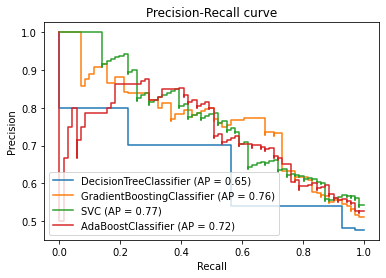

In [85]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf_dt, X_test, y_test, ax = plt.gca() )
plot_precision_recall_curve(clf_gbm, X_test, y_test, ax = plt.gca() )
plot_precision_recall_curve(clf_svm, X_test, y_test, ax = plt.gca() )
plot_precision_recall_curve(clf_ada, X_test, y_test, ax = plt.gca() )

plt.title('Precision-Recall curve')


## Save classifiers


In [86]:
import pickle
outfilename=datafilename.replace('.pkl','-clf_gbm.pkl')
pickle.dump(clf_gbm, open(outfilename, 'wb'))

outfilename=datafilename.replace('.pkl','-clf_svm.pkl')
pickle.dump(clf_svm, open(outfilename, 'wb'))

outfilename=datafilename.replace('.pkl','-clf_ada.pkl')
pickle.dump(clf_ada, open(outfilename, 'wb'))


# Plotting results

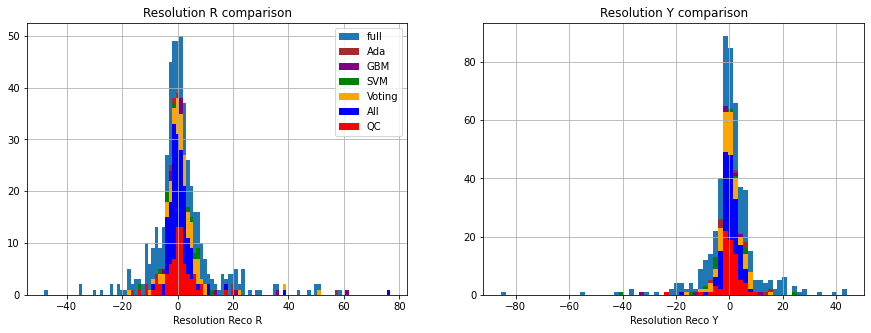

In [126]:
fig, ax = plt.subplots(1,2, figsize=(15,5) )

full=df_cutout['ResolVertexR']
ada=df_cutout.loc[df_cutout['y_ada']>0, 'ResolVertexR']
gbm=df_cutout.loc[df_cutout['y_gbm']>0, 'ResolVertexR']
svm=df_cutout.loc[df_cutout['y_svm']>0, 'ResolVertexR']
voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexR']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexR']
qc    =qdf['ResolVertexR']
bins=np.histogram(np.hstack((full,ada,gbm,svm,voting,all3,qc)), bins=100)[1]
ax[0].hist( full, bins=bins, label='full' )
ax[0].hist( ada, bins=bins, color='brown',label='Ada')
ax[0].hist( gbm, bins=bins, color='purple',label='GBM')
ax[0].hist( svm, bins=bins, color='green',label='SVM')
ax[0].hist( voting, bins=bins, color='orange', label='Voting')
ax[0].hist( all3, bins=bins, color='blue', label='All')
ax[0].hist( qc, bins=bins, color='red', label='QC')
ax[0].set_xlabel("Resolution Reco R")
ax[0].set_title("Resolution R comparison")
ax[0].legend()
ax[0].grid()

full=df_cutout['ResolVertexY']
ada=df_cutout.loc[df_cutout['y_ada']>0, 'ResolVertexY']
gbm=df_cutout.loc[df_cutout['y_gbm']>0, 'ResolVertexY']
svm=df_cutout.loc[df_cutout['y_svm']>0, 'ResolVertexY']
voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexY']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexY']
qc    =qdf['ResolVertexY']
bins=np.histogram(np.hstack((full,ada,gbm,svm,voting,all3,qc)), bins=70)[1]
ax[1].hist( full, bins=bins, label='full' )
ax[1].hist( ada, bins=bins, color='brown',label='Ada')
ax[1].hist( gbm, bins=bins, color='purple',label='GBM')
ax[1].hist( svm, bins=bins, color='green',label='SVM')
ax[1].hist( voting, bins=bins, color='orange', label='Voting')
ax[1].hist( all3, bins=bins, color='blue', label='All')
ax[1].hist( qc, bins=bins, color='red', label='QC')
ax[1].set_xlabel("Resolution Reco Y")
ax[1].set_title("Resolution Y comparison")
ax[1].grid()






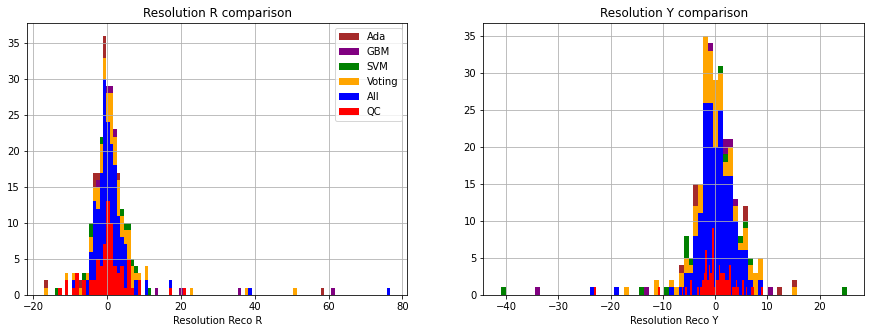

In [123]:
fig, ax = plt.subplots(1,2, figsize=(15,5) )
ada=df_cutout.loc[df_cutout['y_ada']>0, 'ResolVertexR']
gbm=df_cutout.loc[df_cutout['y_gbm']>0, 'ResolVertexR']
svm=df_cutout.loc[df_cutout['y_svm']>0, 'ResolVertexR']
voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexR']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexR']
qc    =qdf['ResolVertexR']
bins=np.histogram(np.hstack((ada,gbm,svm,voting,all3,qc)), bins=100)[1]
ax[0].hist( df_cutout.loc[df_cutout['y_ada']>0, 'ResolVertexR'], bins=bins, color='brown',label='Ada')
ax[0].hist( df_cutout.loc[df_cutout['y_gbm']>0, 'ResolVertexR'], bins=bins, color='purple',label='GBM')
ax[0].hist( df_cutout.loc[df_cutout['y_svm']>0, 'ResolVertexR'], bins=bins, color='green',label='SVM')
ax[0].hist( df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexR'], bins=bins, color='orange', label='Voting')
ax[0].hist( df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexR'], bins=bins, color='blue', label='All')
ax[0].hist( qdf['ResolVertexR'], bins=bins, color='red', label='QC')
ax[0].set_xlabel("Resolution Reco R")
ax[0].set_title("Resolution R comparison")
ax[0].legend()
ax[0].grid()

ada=df_cutout.loc[df_cutout['y_ada']>0, 'ResolVertexY']
gbm=df_cutout.loc[df_cutout['y_gbm']>0, 'ResolVertexY']
svm=df_cutout.loc[df_cutout['y_svm']>0, 'ResolVertexY']
voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexY']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexY']
qc    =qdf['ResolVertexY']
bins=np.histogram(np.hstack((ada,gbm,svm,voting,all3,qc)), bins=70)[1]
ax[1].hist( df_cutout.loc[df_cutout['y_ada']>0, 'ResolVertexY'], bins=bins, color='brown',label='Ada')
ax[1].hist( df_cutout.loc[df_cutout['y_gbm']>0, 'ResolVertexY'], bins=bins, color='purple',label='GBM')
ax[1].hist( df_cutout.loc[df_cutout['y_svm']>0, 'ResolVertexY'], bins=bins, color='green',label='SVM')
ax[1].hist( df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexY'], bins=bins, color='orange', label='Voting')
ax[1].hist( df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexY'], bins=bins, color='blue', label='All')
ax[1].hist( qdf['ResolVertexY'], bins=100, color='red', label='QC')
ax[1].set_xlabel("Resolution Reco Y")
ax[1].set_title("Resolution Y comparison")
ax[1].grid()






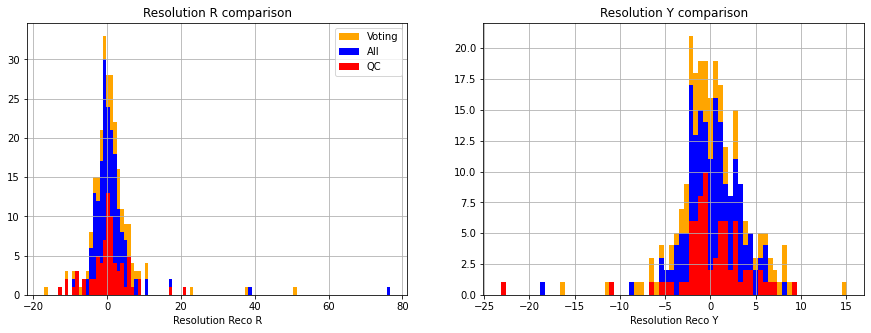

In [134]:
fig, ax = plt.subplots(1,2, figsize=(15,5) )

voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexR']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexR']
qc    =qdf['ResolVertexR']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=100)[1]
ax[0].hist( voting, bins=bins, color='orange',label='Voting')
ax[0].hist( all3,  bins=bins, color='blue',label='All')
ax[0].hist( qc, bins=bins, color='red', label='QC')
ax[0].set_xlabel("Resolution Reco R")
ax[0].set_title("Resolution R comparison")
ax[0].legend()
ax[0].grid()

voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexY']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexY']
qc    =qdf['ResolVertexY']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=70)[1]
ax[1].hist( voting, bins=bins, color='orange', label='Voting')
ax[1].hist( all3, bins=bins, color='blue', label='All')
ax[1].hist( qc, bins=bins, color='red', label='QC')
ax[1].set_xlabel("Resolution Reco Y")
ax[1].set_title("Resolution Y comparison")
ax[1].grid()







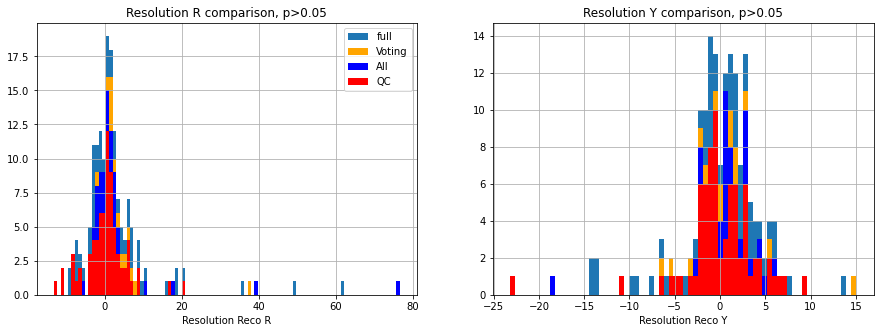

In [133]:
## Check resolution plots for p>0.05

fig, ax = plt.subplots(1,2, figsize=(15,5) )

full=df_cutout.loc[(df['pValue']>0.05), 'ResolVertexR']
voting=df_cutout.loc[(df_cutout['y_voting']>0) & (df['pValue']>0.05), 'ResolVertexR']
all3  =df_cutout.loc[(df_cutout['y_all']>0)  & (df['pValue']>0.05), 'ResolVertexR']
qc    =qdf['ResolVertexR']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=100)[1]
ax[0].hist( full, bins=bins, label='full')
ax[0].hist( voting, bins=bins, color='orange',label='Voting')
ax[0].hist( all3,  bins=bins, color='blue',label='All')
ax[0].hist( qc, bins=bins, color='red', label='QC')
ax[0].set_xlabel("Resolution Reco R")
ax[0].set_title("Resolution R comparison, p>0.05")
ax[0].legend()
ax[0].grid()

full=df_cutout.loc[(df['pValue']>0.05), 'ResolVertexY']
voting=df_cutout.loc[(df_cutout['y_voting']>0) & (df['pValue']>0.05), 'ResolVertexY']
all3  =df_cutout.loc[(df_cutout['y_all']>0) & (df['pValue']>0.05), 'ResolVertexY']
qc    =qdf['ResolVertexY']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=70)[1]
ax[1].hist( full, bins=bins, label='full')
ax[1].hist( voting, bins=bins, color='orange', label='Voting')
ax[1].hist( all3, bins=bins, color='blue', label='All')
ax[1].hist( qc, bins=bins, color='red', label='QC')
ax[1].set_xlabel("Resolution Reco Y")
ax[1].set_title("Resolution Y comparison, p>0.05")
ax[1].grid()








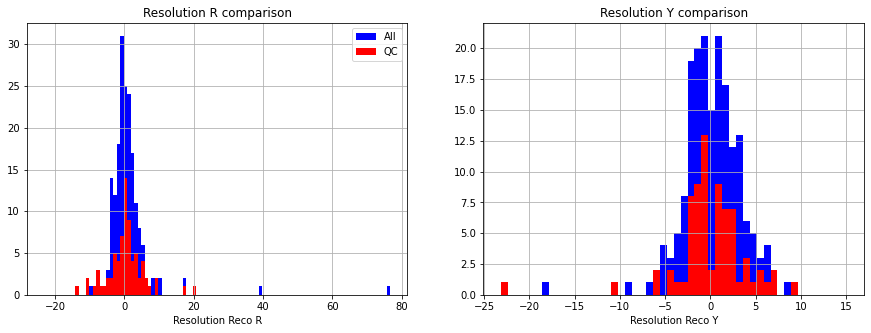

In [115]:
fig, ax = plt.subplots(1,2, figsize=(15,5) )

#voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexR']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexR']
qc    =qdf['ResolVertexR']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=100)[1]
#ax[0].hist( voting, bins=bins, label='Voting')
ax[0].hist( all3,  bins=bins, color='blue', label='All')
ax[0].hist( qc, bins=bins, color='red', label='QC')
ax[0].set_xlabel("Resolution Reco R")
ax[0].set_title("Resolution R comparison")
ax[0].legend()
ax[0].grid()

#voting=df_cutout.loc[df_cutout['y_voting']>0, 'ResolVertexY']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'ResolVertexY']
qc    =qdf['ResolVertexY']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=50)[1]
#ax[1].hist( voting, bins=bins, label='Voting')
ax[1].hist( all3, bins=bins, color='blue', label='All')
ax[1].hist( qc, bins=bins, color='red', label='QC')
ax[1].set_xlabel("Resolution Reco Y")
ax[1].set_title("Resolution Y comparison")
ax[1].grid()








## Lets plot some parameter distributions for tracks that are accepted from each

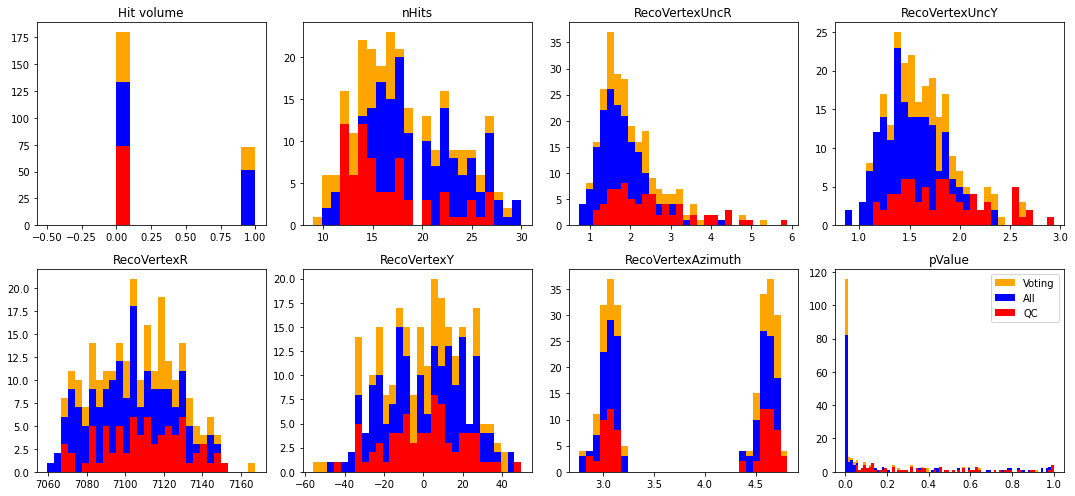

In [116]:
## Take a look at some parameters that are used for QC
fig, ax = plt.subplots(2, 4, figsize=(15,7))
ax[0,0].hist(df_cutout.loc[df_cutout['y_voting']>0,'hitVolume'], color='orange', label='Voting')
ax[0,0].hist(df_cutout.loc[df_cutout['y_all']>0,'hitVolume'], color='blue', label='All')
ax[0,0].hist(qdf['hitVolume'], color='red', label='QC')
ax[0,0].set_title('Hit volume')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'nHits']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'nHits']
qc    =qdf['nHits']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=23)[1]
ax[0,1].hist(voting, bins=bins, color='orange', label='Voting')
ax[0,1].hist(all3, bins=bins,color='blue',  label='All')
ax[0,1].hist(qc, bins=bins, color='red', label='QC')
ax[0,1].set_title('nHits')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'RecoVertexUncR']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'RecoVertexUncR']
qc    =qdf['RecoVertexUncR']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[0,2].hist(voting, bins=bins, color='orange', label='Voting')
ax[0,2].hist(all3, bins=bins, color='blue', label='All')
ax[0,2].hist(qc, bins=bins, color='red', label='QC')
ax[0,2].set_title('RecoVertexUncR')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'RecoVertexUncY']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'RecoVertexUncY']
qc    =qdf['RecoVertexUncY']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[0,3].hist(voting, bins=bins, color='orange', label='Voting')
ax[0,3].hist(all3, bins=bins, color='blue', label='All')
ax[0,3].hist(qc, bins=bins, color='red', label='QC')
ax[0,3].set_title('RecoVertexUncY')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'RecoVertexR']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'RecoVertexR']
qc    =qdf['RecoVertexR']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[1,0].hist(voting, bins=bins, color='orange', label='Voting')
ax[1,0].hist(all3, bins=bins, color='blue', label='All')
ax[1,0].hist(qc, bins=bins, color='red', label='QC')
ax[1,0].set_title('RecoVertexR')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'RecoVertexY']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'RecoVertexY']
qc    =qdf['RecoVertexY']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[1,1].hist(voting, bins=bins, color='orange', label='Voting')
ax[1,1].hist(all3, bins=bins, color='blue', label='All')
ax[1,1].hist(qc, bins=bins, color='red', label='QC')
ax[1,1].set_title('RecoVertexY')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'RecoVertexAzimuth']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'RecoVertexAzimuth']
qc    =qdf['RecoVertexAzimuth']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[1,2].hist(voting, bins=bins, color='orange', label='Voting')
ax[1,2].hist(all3, bins=bins, color='blue', label='All')
ax[1,2].hist(qc, bins=bins, color='red', label='QC')
ax[1,2].set_title('RecoVertexAzimuth')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'pValue']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'pValue']
qc    =qdf['pValue']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=80)[1]
ax[1,3].hist(voting, bins=bins, color='orange', label='Voting')
ax[1,3].hist(all3, bins=bins, color='blue', label='All')
ax[1,3].hist(qc, bins=bins, color='red', label='QC')
ax[1,3].set_title('pValue')
ax[1,3].legend()


fig.tight_layout()

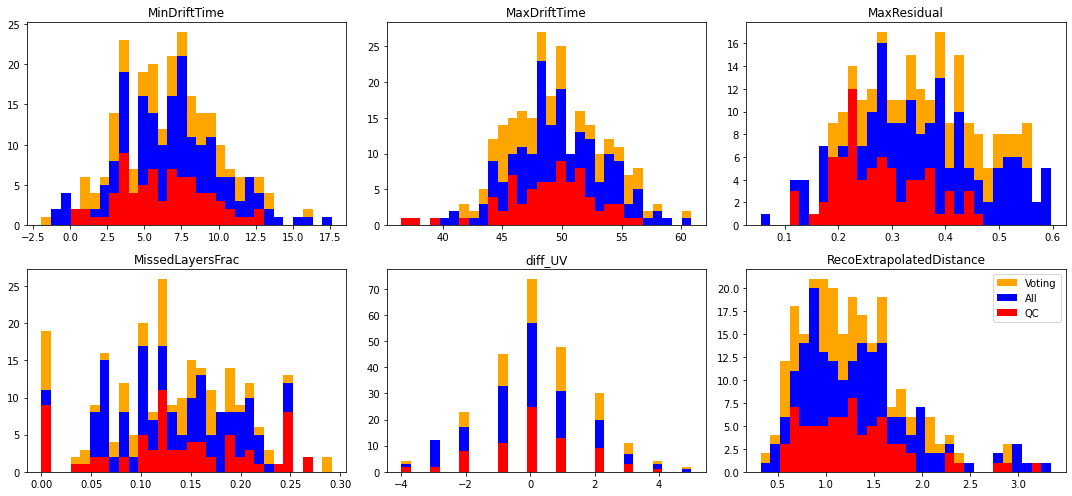

In [117]:
## Some more parameters:
fig, ax = plt.subplots(2, 3, figsize=(15,7))

voting=df_cutout.loc[df_cutout['y_voting']>0, 'MinDriftTime']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'MinDriftTime']
qc    =qdf['MinDriftTime']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[0,0].hist(voting, bins=bins, color='orange', label='Voting')
ax[0,0].hist(all3, bins=bins, color='blue', label='All')
ax[0,0].hist(qc, bins=bins, color='red', label='QC')
ax[0,0].set_title('MinDriftTime')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'MaxDriftTime']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'MaxDriftTime']
qc    =qdf['MaxDriftTime']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[0,1].hist(voting, bins=bins, color='orange', label='Voting')
ax[0,1].hist(all3, bins=bins, color='blue', label='All')
ax[0,1].hist(qc, bins=bins, color='red', label='QC')
ax[0,1].set_title('MaxDriftTime')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'MaxResidual']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'MaxResidual']
qc    =qdf['MaxResidual']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[0,2].hist(voting, bins=bins, color='orange', label='Voting')
ax[0,2].hist(all3, bins=bins, color='blue', label='All')
ax[0,2].hist(qc, bins=bins, color='red', label='QC')
ax[0,2].set_title('MaxResidual')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'MissedLayersFrac']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'MissedLayersFrac']
qc    =qdf['MissedLayersFrac']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[1,0].hist(voting, bins=bins, color='orange', label='Voting')
ax[1,0].hist(all3, bins=bins, color='blue', label='All')
ax[1,0].hist(qc, bins=bins, color='red', label='QC')
ax[1,0].set_title('MissedLayersFrac')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'diff_UV']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'diff_UV']
qc    =qdf['diff_UV']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[1,1].hist(voting, bins=bins, color='orange', label='Voting')
ax[1,1].hist(all3, bins=bins, color='blue', label='All')
ax[1,1].hist(qc, bins=bins, color='red', label='QC')
ax[1,1].set_title('diff_UV')

voting=df_cutout.loc[df_cutout['y_voting']>0, 'RecoExtrapolatedDistance']
all3  =df_cutout.loc[df_cutout['y_all']>0, 'RecoExtrapolatedDistance']
qc    =qdf['RecoExtrapolatedDistance']
bins=np.histogram(np.hstack((voting,all3,qc)), bins=30)[1]
ax[1,2].hist(voting, bins=bins, color='orange', label='Voting')
ax[1,2].hist(all3, bins=bins, color='blue', label='All')
ax[1,2].hist(qc, bins=bins, color='red', label='QC')
ax[1,2].set_title('RecoExtrapolatedDistance')
ax[1,2].legend()


fig.tight_layout()

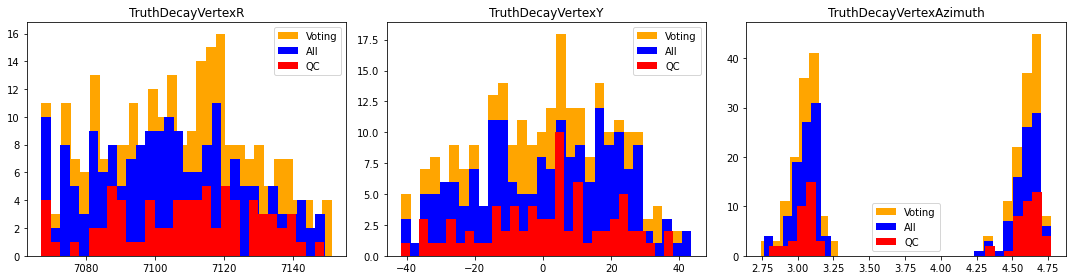

In [118]:
## Truth vertex
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].hist(df_cutout.loc[df_cutout['y_voting']>0,'TruthDecayVertexR'], bins=30, color='orange', label='Voting')
ax[0].hist(df_cutout.loc[df_cutout['y_all']>0,'TruthDecayVertexR'], bins=30, color='blue', label='All')
ax[0].hist(qdf['TruthDecayVertexR'], bins=30, color='red', label='QC')
ax[0].set_title('TruthDecayVertexR')
ax[0].legend()

ax[1].hist(df_cutout.loc[df_cutout['y_voting']>0,'TruthDecayVertexY'], bins=30, color='orange', label='Voting')
ax[1].hist(df_cutout.loc[df_cutout['y_all']>0,'TruthDecayVertexY'], color='blue', bins=30, label='All')
ax[1].hist(qdf['TruthDecayVertexY'], bins=30, color='red', label='QC')
ax[1].set_title('TruthDecayVertexY')
ax[1].legend()

ax[2].hist(df_cutout.loc[df_cutout['y_voting']>0,'TruthDecayVertexAzimuth'], bins=30, color='orange', label='Voting')
ax[2].hist(df_cutout.loc[df_cutout['y_all']>0,'TruthDecayVertexAzimuth'], bins=30, color='blue', label='All')
ax[2].hist(qdf['TruthDecayVertexAzimuth'], bins=30, color='red', label='QC')
ax[2].set_title('TruthDecayVertexAzimuth')
ax[2].legend()

fig.tight_layout()

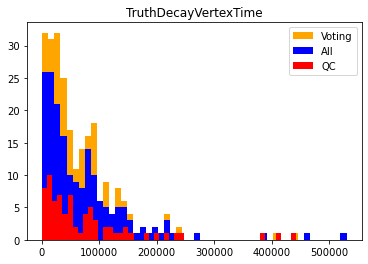

In [119]:
fig, ax = plt.subplots()
ax.hist(df_cutout.loc[df_cutout['y_voting']>0,'TruthDecayVertexTime'], bins=50, color='orange', label='Voting')
ax.hist(df_cutout.loc[df_cutout['y_all']>0,'TruthDecayVertexTime'], bins=50, color='blue', label='All')
ax.hist(qdf['TruthDecayVertexTime'], bins=50, color='red', label='QC')
ax.set_title('TruthDecayVertexTime')
ax.legend()



## Feature selection

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 ## needs non-negative values, therefore rescaling of input is necessary
from sklearn.feature_selection import mutual_info_classif

## list of potentially useful variables/features
clf_vars=['RecoTrackX','RecoTrackY','RecoTrackZ',
          'pValue', 'nHits', 'nUHits','nVHits', 'MissedLayersFrac','MinDriftTime','MaxDriftTime','MaxResidual',
          'RecoVertexX', 'RecoVertexY', 'RecoVertexZ', 'RecoVertexR',
          'RecoVertexUncP', 'RecoVertexUncY', 'RecoVertexUncPY', 'RecoVertexUncR',
          'RecoVertexUncPR', 'hitVolume', 'RecoExtrapolatedDistance',
          'CaloVertexMomUnc', 'CaloVertexUncX',
          'CaloVertexUncY', 'CaloVertexUncPX', 'CaloVertexUncPY','diff_UV', 'RecoVertexAzimuth']

X=df_cutout[clf_vars].values
y=df_cutout['quality'].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
#apply SelectKBest class to extract best features
best_features = SelectKBest(score_func=mutual_info_classif, k=10)
fit = best_features.fit(X_train,y_train)

In [97]:
df_features=pd.DataFrame()
df_features['Feature']=clf_vars
df_features['Score']=fit.scores_

In [98]:
df_features

,Feature,Score
0,RecoTrackX,0.067924
1,RecoTrackY,0.000000
2,RecoTrackZ,0.065031
3,pValue,0.035865
4,nHits,0.137768
5,nUHits,0.026205
6,nVHits,0.095462
7,MissedLayersFrac,0.048835
8,MinDriftTime,0.003607
9,MaxDriftTime,0.023478


In [102]:
df_features.sort_values(by='Score',ascending=False)

,Feature,Score
4,nHits,0.137768
18,RecoVertexUncR,0.113250
6,nVHits,0.095462
25,CaloVertexUncPX,0.085787
16,RecoVertexUncY,0.083898
22,CaloVertexMomUnc,0.082048
15,RecoVertexUncP,0.082048
17,RecoVertexUncPY,0.075616
26,CaloVertexUncPY,0.073844
0,RecoTrackX,0.067924
